<a href="https://colab.research.google.com/github/lalopezpa/stochastics/blob/main/Tutorial_03_cami.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



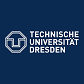

>**Stochastic Modeling and Simulation**

> Winter Semester 2024/25







The following questions are for helping you in understanding the contents of the lecture. Your answers will not be collected or graded but we will discuss the solutions in the class. If you cannot easily answer the questions or have doubts regarding the correctness of your answers, please take a few minutes to review the contents in the book or through the web. Also, please feel free to ask your questions and concerns about the questions in the tutorial classes or in the Forum in the Opal page for the course.

In the code cells, please change the ***None*** values between **##start** and **##end** to a desirable code or value. Then, you can run the cell.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Transformation of discrete random variables



*   Roll a dice (X) and multiply the value by 10 ($Y = 10X$). What is the PMF of $Y$ ?
*   Let X be a discrete uniform random variable on $\{ -n, -n + 1, \dots , n - 1, n \}$. What is the
PMF of $Y = X^2$?
*   Let X be a Poisson random variable on $xϵ\{0, 1, 2, 3, ...\}$. What is the PMF of its linear
transformation $Y = aX + b$?


# Transformation of continuous random variables

Let $ X \sim U(0, 1) $ where its PDF is:
\
$
f_X(x) = \begin{cases}
1, & \text{if } x \in [0, 1], \\
0, & \text{otherwise}.
\end{cases}
$



*   What is the PDF of $Y$ if $Y = 2X$?
*   What is the PDF of $Y$ if $Y = 2 - X$?
*   What is the PDF of $Y$ if $Y = X^p$?


# Uniform random number generators

The linear congruential generator (**LCG**) gives pseudo-random numbers $\mu_i$ from a uniform distribution $U(0, 1)$. You can read more about this algorithm here: https://en.wikipedia.org/wiki/Linear_congruential_generator


The algorithm can be expressed as follows:



- **Initialize** $ a, m, z_0, n$

- **Set** $i = 1$

- **While** $i < n$  **do**:

    i. $z_i \gets (a \cdot z_{i-1} + c) \mod m$

    ii. $u_i \gets \frac{z_i}{m}$
    
    iii. $i \gets i + 1$


In the following code, you can implement this algoritm using a multiplier $a = 7$, modulus $m = 2^{13} - 1$, and a seed of $z_0 = 1$.
\
Can you explain what you observe in the last plots?

In [ ]:
# Linear Congruential Generator (LCG) implementation
def lcg(seed, a, c, m, n):
    """
    Generates 'n' random numbers using the Linear Congruential Generator (LCG) method.

    seed: Initial seed value
    a: Multiplier
    c: Increment
    m: Modulus
    n: Number of random numbers to generate

    return: Array of 'n' generated random numbers
    """
    # Initialize list for random numbers
    random_numbers = []
    z = seed  # Initial seed

    ##start
    for _ in range(n):
        z = (a*c + b)  # Apply LCG formula (step i)
        u = z/m            # Scale the number to [0, 1) (step ii)
        random_numbers.append(u)
    ##end
    return np.array(random_numbers)

# Parameters for the LCG
seed = 1  # Initial seed value
a = 7  # Multiplier (common choice for many LCGs)
c = 0  # Increment (common choice for many LCGs)
m = 2**13-1  # Modulus (2^32 is a common choice)
n = 1000  # Number of random numbers to generate

# Generate random numbers using LCG

##start

random_numbers = lcg(seed, a, c, m, n)

##end

x = np.linspace(0, 1, 10)
freq, base = np.histogram(random_numbers , bins=x )
cdf = np.cumsum( freq ) /np .cumsum( freq )[-1]

# Generate random numbers using numpy.random.uniform
freq_r, base_r = np.histogram(np.random.uniform(0, 1, n) , bins=x )
cdf_r = np.cumsum( freq_r ) /np .cumsum( freq_r )[-1]


# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2)

# First subplot: CDF for LCG
axes[0, 0].plot(base[1:], cdf)
axes[0, 0].set_title('Linear Congruential Generator (LCG) Output')
axes[0, 0].set_xlabel('X')
axes[0, 0].set_ylabel('CDF')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 1)
axes[0, 0].set_ylim(0, 1.2)

# Second subplot: CDF for numpy uniform generator
axes[0, 1].plot(base[1:], cdf)
axes[0, 1].set_title('Numpy Uniform Generator')
axes[0, 1].set_xlabel('X')
axes[0, 1].set_ylabel('CDF')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 1)
axes[0, 1].set_ylim(0, 1.2)

# Third subplot: PDF for LCG
axes[1, 0].plot(base[1:], (freq / n) / base[1])
axes[1, 0].set_title('Linear Congruential Generator (LCG) Output')
axes[1, 0].set_xlabel('X')
axes[1, 0].set_ylabel('PDF')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 1)
axes[1, 0].set_ylim(0, 1.2)

# Fourth subplot: PDF for numpy uniform generator
axes[1, 1].plot(base[1:], (freq_r / n) / base_r[1])
axes[1, 1].set_title('Numpy Uniform Generator')
axes[1, 1].set_xlabel('X')
axes[1, 1].set_ylabel('PDF')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1.2)

# Show the plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

NameError: name 'b' is not defined

![mem_random_number_generation.jpg](attachment:mem_random_number_generation.jpg)

# Simulating other distributions from a uniform distribution

Use the following code box to simulate 100 random numbers from a Bernoulli distribution $ Y \sim B(0.7) $, generated from $ X \sim U(0, 1) $.

In [ ]:
##start

# Simulating 100 random numbers from U(0, 1)
X = np.random.uniform(None, None, None)

# Generating Bernoulli random variables Y based on X
Y = (X > None).astype(int)  # Bernoulli distribution with p = 0.5


##end


# Plotting
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of X versus Y')
plt.show()

In [ ]:
# Calculate the probabilities for each value of Y
unique_values, counts = np.unique(Y, return_counts=True)
probs_Y = counts / len(Y)

# Plot y versus P(y)
plt.bar(unique_values, probs_Y, width=0.05, align='center', color='red')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.title('Plot of y versus P(y)')
plt.grid(True)
plt.show()

Consider a random variable $ Y $ that takes values 1, 3, and 4 with the following probabilities:

$
P(Y = 1) = \frac{3}{5}, \quad P(Y = 3) = \frac{1}{5}, \quad P(Y = 4) = \frac{1}{5}.
$



Using the code box below, you can simulate 1000 random numbers from $ Y $, generated from $ X \sim U(0, 1) $.


In [ ]:
# Define the probabilities and corresponding values of Y
probabilities = [3/5, 1/5, 1/5]
values_Y = [1, 3, 4]

# Simulate 1000 random numbers from X ~ U(0, 1)
X = np.random.uniform(0, 1, 1000)

# Generate Y based on the probabilities using the inverse transform method
Y = []
##start

for x in X:
  if x < probabilities[0]:
    Y.append(values_Y[0])
  elif None < x < None:
    Y.append(None)
  else:
    Y.append(None)

##end

# Calculate the probabilities for each value of Y
unique_values, counts = np.unique(Y, return_counts=True)
probs_Y = counts / len(Y)

# Plot y versus P(y)
plt.bar(unique_values, probs_Y, width=0.05, align='center', color='red')
plt.xlabel('y')
plt.ylabel('P(y)')
plt.title('Plot of y versus P(y)')
plt.grid(True)
plt.show()

Let $X \sim U(0, 1)$ and we want to find the inverse transform to obtain a random variable $ Y \sim \text{Exp}(\lambda) $, where the CDF of $ Y $ is given by:



$
F_Y(y) =
\begin{cases}
0 & \text{if } y < 0, \\
1 - e^{-\lambda y} & \text{if } y \geq 0.
\end{cases}
$



How can we generate random variable $ Y \sim \text{Exp}(\lambda) $ using random numbers generated from a uniform distribution ($X$ ) and the inverse transform ?

Please complete the following code box to simulate 1000 random variables using this method. Are the generated RVs satisfying your expectations? What can you say from the plot?

In [ ]:
# Set the rate parameter lambda for the exponential distribution
lambda_param = 1.0  # You can change this value to your specific lambda

# Generate 1000 random numbers from a uniform distribution U(0, 1)
X = np.random.uniform(0, 1, 1000)

# Apply the inverse transform to generate random numbers from Exp(lambda)

##start

Y = None

##end


# Plot the generated values of Y
plt.hist(Y, bins=30, density=True, alpha=0.6, color='g')
plt.title(f'Histogram of Exponential Distribution (lambda={lambda_param})')
plt.xlabel('Y')
plt.ylabel('Density')
plt.grid(True)
plt.show()